# **Notebook 4: Price Analysis**

## Objectives

* **Explore Relationships Between Features and Sale Price**
  * Conduct in-depth analysis of the relationships between house attributes and the target variable, `SalePrice`.
  * Utilize visualizations and statistical methods to identify trendds and patterns that affect property values.
* **Validate Business Hypotheses**
  * Test key hypotheses about the drivers of house prices, including the influence of quality, size and location attributes.
* **Generate Insights for Client Needs**
  * Provide actionable insights to help the Client to understand the factors influencing the value of their inherited properties and similar houses in Ames, Iowa.
  * Present findings in a clear and interpretable manner for client use.
* **Prepare Visualizations for Dashboard**
  * Develop interactive and static visualizations that effectively communicate findings and lign with the dashboard requirements.

## Inputs

* **Processed Datasets**
  * `x_train_transformed.csv`: Feature-engineered and scaled training dataset for modeling and analysis.
  * `x_test_transformed.csv`: Feature-engineered and scales testing dataset for validation.
  * `y_train.csv`: Training dataset target variable (SalePrice).
  * `y_test.csv`: Testing dataset target variable (SalePrice).
* **Supplementary Data**
  * Domain knowledge and project-specific hypotheses for guiding analysis.
* **Stored Locations**
  * Datasets are located in the `outputs/datasets/processed/transformed/` and `outputs/datasets/processed/split/` directories.

## Outputs

* **Insights and Findings**
  * Detailed analysis of the relationships between key features and sale price.
  * Validation of hypotheses with supporting evidence.
* **Visualizations**
  * Scatter plots, box plots, heatmaps, and other graphical representations to highlight trends and patterns.
  * Summary visualizations prepared for dashboard integration.
* **Documentation**
  * Summary of analysis, key takeaways, and recommendations for downstream modeling and dashboard integration.

## Additional Comments

* **Context**
  * This notebook focuses on data exploration and analysis, bridhing the gap between feature engineering and model building. It provides the foundation for deriving insights and recommendations.
* **Alignment with CRISP-DM**
  * This notebook aligns with the Data Understanding and Business Understanding steps, ensuring that exploratory findings are actionable and relevant to the client's needs.
* **Next Steps**
  * The outputs from this notebook will inform the Model Training and Evaluation notebook, where predictive models will be developed and optimized.


---

## Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5'

---

## Load and Prepare Data

**Overview**
In this section, we will:
1. Load the processed datasets required for price analysis.
2. Confirm the structure and contents of the datasets to ensure readiness for analysis.
3. Handle any discrepancies, such as missing values, to ensure datasets are aligned and complete for further analysis.
4. Verify that the datasets have the expected shapes and structures.

In [6]:
import pandas as pd

# Define file paths for datasets
x_train_path = "outputs/datasets/processed/transformed/x_train_transformed.csv"
x_test_path = "outputs/datasets/processed/transformed/x_test_transformed.csv"
y_train_path = "outputs/datasets/processed/split/y_train.csv"
y_test_path = "outputs/datasets/processed/split/y_test.csv"

# Load Datasets
x_train = pd.read_csv(x_train_path)
x_test = pd.read_csv(x_test_path)
y_train = pd.read_csv(y_train_path)
y_test = pd.read_csv(y_test_path)

# Align x_test with y_test to ensure the rows match
x_test = x_test.loc[y_test.index].reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Validate the Alignment
print("Aligned x_test shape:", x_test.shape)
print("ALigned y_test shape:", y_test.shape)
assert x_test.shape[0] == y_test.shape[0], "x_test and y_test row counts do not match!"

# Check for residual missing values in x_test and handle them
print("\nChecking for missing values in testing features before handling:")
print(x_test.isnull().sum())

# Fill missing values column-wise if necessary
x_test = x_test.fillna(x_test.mean())

print("\nChecking for missing values in testing features after handling:")
print(x_test.isnull().sum())

# Display basic information about the datasets
print("Training Features Dataset:")
print(x_train.info())
print("\nTesting Features Dataset:")
print(x_test.info())
print("\nTraining Target Dataset:")
print(y_train.info())
print("\nTesting Target Dataset:")
print(y_test.info())

# Preview the first few rows of each dataset
print("\nPreview of Training Features Dataset:")
display(x_train.head())

print("\nPreview of Testing Features Dataset:")
display(x_test.head())

print("\nPreview of Training Target Dataset:")
display(y_train.head())

print("\nPreview of Testing Target Dataset:")
display(y_test.head())

# Check for missing values in training datasets
print("\nChecking for missing values in training features:")
print(x_train.isnull().sum())

print("\nChecking for missing values in training target:")
print(y_train.isnull().sum())


Aligned x_test shape: (292, 21)
ALigned y_test shape: (292, 1)

Checking for missing values in testing features before handling:
num__LotFrontage       0
num__LotArea           0
num__OpenPorchSF       0
num__MasVnrArea        0
num__BsmtFinSF1        0
num__GrLivArea         0
num__1stFlrSF          0
num__YearBuilt         0
num__YearRemodAdd      0
num__BedroomAbvGr      0
num__2ndFlrSF          0
num__BsmtUnfSF         0
num__GarageArea        0
num__GarageYrBlt       0
num__OverallCond       0
num__OverallQual       0
Age                  239
LivingLotRatio       239
FinishedBsmtRatio    239
OverallScore         239
HasPorch             239
dtype: int64

Checking for missing values in testing features after handling:
num__LotFrontage     0
num__LotArea         0
num__OpenPorchSF     0
num__MasVnrArea      0
num__BsmtFinSF1      0
num__GrLivArea       0
num__1stFlrSF        0
num__YearBuilt       0
num__YearRemodAdd    0
num__BedroomAbvGr    0
num__2ndFlrSF        0
num__BsmtUnfSF 

,num__LotFrontage,num__LotArea,num__OpenPorchSF,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__1stFlrSF,num__YearBuilt,num__YearRemodAdd,num__BedroomAbvGr,...,num__BsmtUnfSF,num__GarageArea,num__GarageYrBlt,num__OverallCond,num__OverallQual,num__Age,num__LivingLotRatio,num__FinishedBsmtRatio,num__OverallScore,cat__HasPorch_1
0,0.144140,-0.161873,-1.096169,-0.827815,0.865283,-0.292584,0.526873,0.455469,1.346063,-0.288836,...,-0.400282,-0.863837,0.192392,0.372217,-0.820445,-0.455469,-0.116096,0.887733,-0.437833,0.0
1,-0.392921,-0.304082,0.617419,-0.827815,-1.416429,0.250597,-1.040595,-0.718609,-0.439214,-0.288836,...,0.511920,-0.456264,0.272225,1.268609,-0.088934,0.718609,0.455054,-1.415946,0.858190,1.0
2,0.006402,-0.071879,-1.096169,-0.827815,-1.416429,-1.816242,-1.052445,1.988293,1.683818,0.645680,...,0.505196,-2.257169,-4.147410,1.268609,-0.820445,-1.988293,-1.409123,-1.415946,0.102176,0.0
3,-0.340186,-0.477855,-1.096169,1.276291,0.704206,0.609851,-0.394093,1.107734,1.683818,-0.288836,...,-0.915776,-1.119755,0.152476,1.268609,-0.820445,-1.107734,0.918129,0.640194,0.102176,0.0
4,-0.911425,-1.225280,-1.096169,-0.827815,0.384534,0.474436,-0.252776,1.531707,1.683818,-0.288836,...,0.532091,-0.797488,0.119212,0.372217,-0.820445,-1.531707,1.593562,0.340697,-0.437833,0.0



Preview of Testing Features Dataset:


,num__LotFrontage,num__LotArea,num__OpenPorchSF,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__1stFlrSF,num__YearBuilt,num__YearRemodAdd,num__BedroomAbvGr,...,num__BsmtUnfSF,num__GarageArea,num__GarageYrBlt,num__OverallCond,num__OverallQual,Age,LivingLotRatio,FinishedBsmtRatio,OverallScore,HasPorch
0,0.144140,-0.158460,-1.096169,-0.827815,0.755219,-0.922794,-0.126358,0.227176,-0.873470,-2.157869,...,-0.391317,-1.006014,0.205698,2.165000,-0.088934,1986.358491,0.798551,0.515713,35.037736,0.566038
1,1.204764,0.612540,0.517257,1.413568,0.902910,1.808434,0.944129,-0.783836,-0.487465,-2.157869,...,-0.312872,1.117159,0.274443,-0.524174,1.374088,1986.358491,0.798551,0.515713,35.037736,0.566038
2,-0.556568,-0.029579,-1.096169,-0.827815,-1.416429,-1.038836,-0.246639,1.401254,1.683818,-1.223352,...,0.980347,-0.551048,0.125865,0.372217,-0.820445,1986.358491,0.798551,0.515713,35.037736,0.566038
3,-0.911425,-1.225280,0.389147,-0.827815,0.585846,0.425488,-0.321073,0.748988,1.683818,-2.157869,...,0.077111,-0.266695,0.176869,1.268609,-0.088934,1986.358491,0.798551,0.515713,35.037736,0.566038
4,0.900684,0.717202,-1.096169,0.793095,0.899659,0.343995,1.186707,-1.207808,-1.114724,-1.223352,...,0.061422,2.065003,0.305489,-0.524174,2.105599,1986.358491,0.798551,0.515713,35.037736,0.566038



Preview of Training Target Dataset:


,SalePrice
0,145000
1,178000
2,85000
3,175000
4,127000



Preview of Testing Target Dataset:


,SalePrice
0,154500
1,325000
2,115000
3,159000
4,315500



Checking for missing values in training features:
num__LotFrontage          0
num__LotArea              0
num__OpenPorchSF          0
num__MasVnrArea           0
num__BsmtFinSF1           0
num__GrLivArea            0
num__1stFlrSF             0
num__YearBuilt            0
num__YearRemodAdd         0
num__BedroomAbvGr         0
num__2ndFlrSF             0
num__BsmtUnfSF            0
num__GarageArea           0
num__GarageYrBlt          0
num__OverallCond          0
num__OverallQual          0
num__Age                  0
num__LivingLotRatio       0
num__FinishedBsmtRatio    0
num__OverallScore         0
cat__HasPorch_1           0
dtype: int64

Checking for missing values in training target:
SalePrice    0
dtype: int64


**Expected Outputs:**

1. **Dataset Structure:**
   - Training Features: 1168 rows and 21 columns, all numeric and scaled (`float64`).
   - Testing Features: 292 rows and 21 columns, all numeric and scaled (`float64`).
   - Training Target: 1168 rows and 1 column (`int64`).
   - Testing Target: 292 rows and 1 column (`int64`).
2. **Data Alignment:**
   - Testing features (x_test) and target (y_test) datasets are aligned with matching rows.
3. **Handling Missing Values:**
   - Missing values in the testing features dataset (`x_test`) are addressed by filling with column-wise means.
   - The final datasets show no missing values, as confirmed by the `0` counts accross all columns.
4. **Preview of Data:**
   - The first few rows of each dataset confirm the structure, scaling and content.
   - Features are scaled, and target variables are numeric.
5. **Readiness for Analysis:**
   - Datasets are complete, aligned, and preprocessed for further exploration.

---

## Exploratory Data Analysis (EDA)

### Sale Price Distribution

Understanding the distribution of the target variable, `SalePrice`, is a crucial step in our exploratory data analysis. This section focuses on:

1. Examining the overall distribution of `SalePrice`.
2. Identifying any skewness or potential outliers.
3. Determining whether transformations are needed to improve the distribution's suitability for modeling.
4. Comparing the distributions in training and testing datasets to ensure consistency.

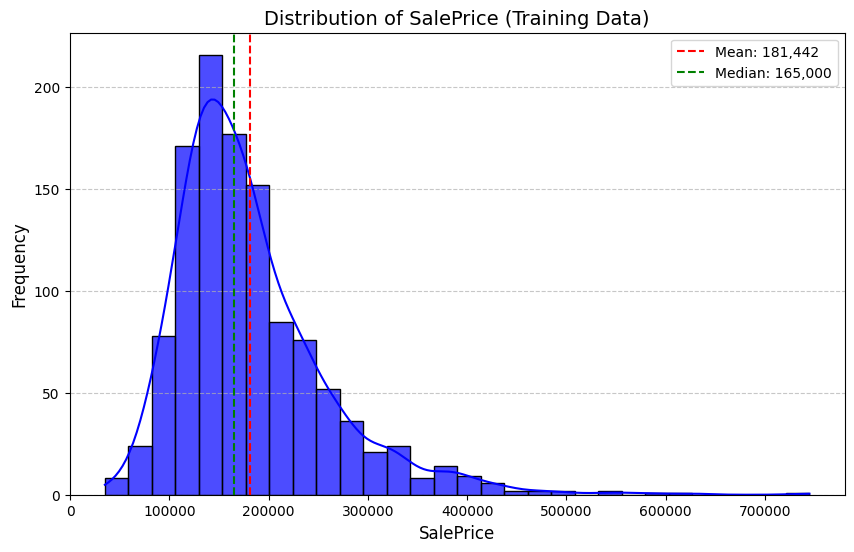

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Plot the SalePrice distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_train['SalePrice'], kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(y_train['SalePrice'].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f"Mean: {y_train['SalePrice'].mean():,.0f}")
plt.axvline(y_train['SalePrice'].median(), color='green', linestyle='dashed', linewidth=1.5, label=f"Median: {y_train['SalePrice'].median():,.0f}")
plt.title("Distribution of SalePrice (Training Data)", fontsize=14)
plt.xlabel("SalePrice", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observations:**

1. The distribution appears to be right-skewed, with most properties clustered at lower price ranges.
2. The mean (`red dashed line`) is slightly higher than the median (`green dashed line`), which is typical of a skewed distribution.
3. The long tail suggests the presence of outliers or high-value properties.
4. Skewness should be further analyzed to determine if a transformation (e.g., log) is required.

In [8]:
# Calculate skewness
saleprice_skewness = skew(y_train['SalePrice'])
print(f"Skewness of SalePrice: {saleprice_skewness:.2f}")

Skewness of SalePrice: 1.74


#### Skewness Analysis

- The calculated skewness of 'SalePrice' is **1.74**, indicating a moderately to highly right-skewed distribution.
- A skewed distribution can negatively impact certain models, such as linear regression, which assumes a normally distributed target variable.
- Applying a log transformation can help reduce skewness and normalize the distribution, improving model performance.

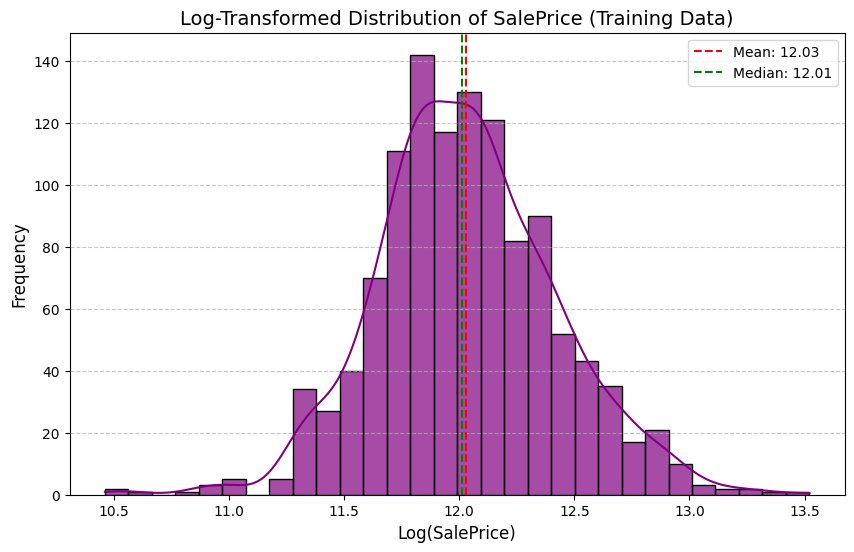

In [9]:
# Log transform SalePrice to reduce skewness
import numpy as np

y_train['LogSalePrice'] = np.log1p(y_train['SalePrice'])

# Replot the log-transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_train['LogSalePrice'], kde=True, bins=30, color='purple', alpha=0.7)
plt.axvline(y_train['LogSalePrice'].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f"Mean: {y_train['LogSalePrice'].mean():.2f}")
plt.axvline(y_train['LogSalePrice'].median(), color='green', linestyle='dashed', linewidth=1.5, label=f"Median: {y_train['LogSalePrice'].median():.2f}")
plt.title("Log-Transformed Distribution of SalePrice (Training Data)", fontsize=14)
plt.xlabel("Log(SalePrice)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Calculate skewness after log transformation
log_skewness = skew(y_train['LogSalePrice'])
print(f"Skewness of Log_transformed SalePrice: {log_skewness:.2f}")

Skewness of Log_transformed SalePrice: 0.12


#### Updated Skewness Analysis

- The log transformation significantly reduced the skewness of the `SalePrice` distribution.
- **Skewness before transformation:** **1.74** (indicating a moderately to high right-skewed distribution).
- **Skewness after transformation:** **0.12** (indicating a nearly symmetrical distribution).
- The closeness of the mean and median, as shown in the output visualization, confirms the normalized distribution of the log-transformed `SalePrice`.
- This transformation ensures that the target variable is better suited for modeling, particularly for models that assume a normally distributed target variable, such as linear regression.

### Correlation Analysis

In this section, we will explore the relationships between the target variable (`LogSalePrice`) and the numerical features in the training dataset.

**Goals:**
1. Identify features with the strongest positive or negative correlations with `LogSalePrice`.
2. Visualize these relationships using a heatmap and scatterplots.
3. Gain Insights into which features are likely to contribute most to predictive modeling.

**Correlation values range from *-1* to *1*:**
- **Positive Correlation (close to 1):** As one variable increases, the other also increases.
- **Negative Correlation (close to -1):** As one variable increases, the other decreases.
- **No Correlation (close to 0):** Little to no linear relationship between the variables.

Top Correlations with LogSalePrice:
LogSalePrice         1.000000
num__OverallQual     0.807946
num__GrLivArea       0.723567
num__GarageArea      0.654520
num__1stFlrSF        0.595208
num__OverallScore    0.593869
num__Age             0.576725
num__OpenPorchSF     0.461196
cat__HasPorch_1      0.454871
num__LotArea         0.415857
Name: LogSalePrice, dtype: float64


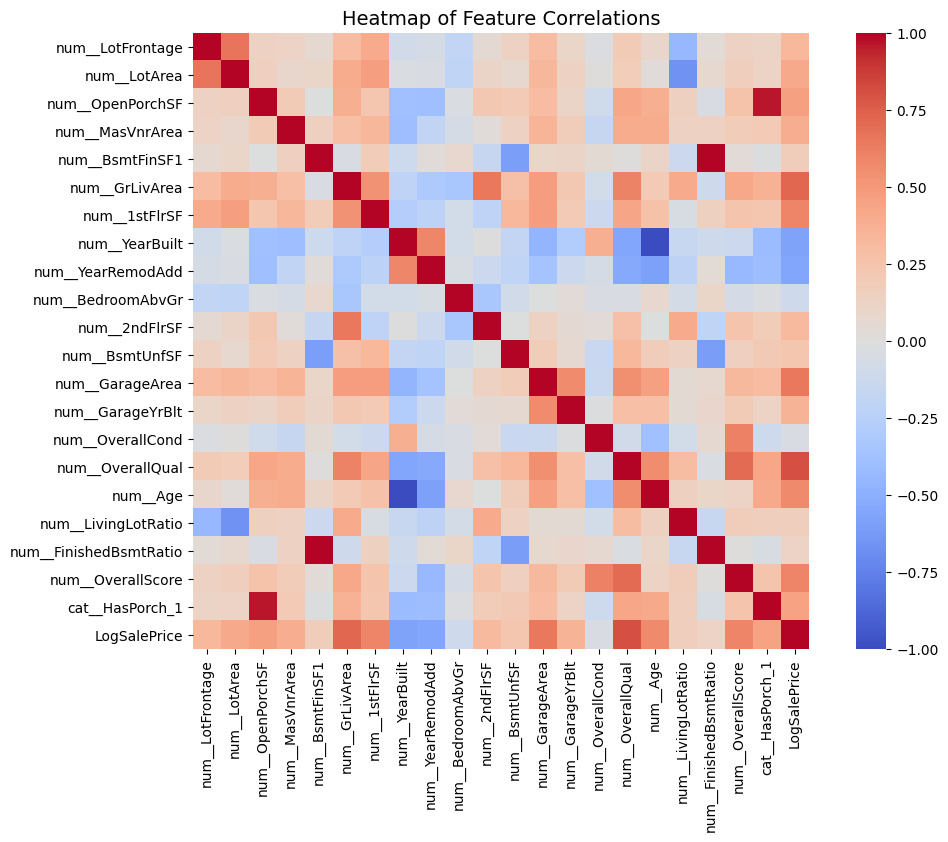

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Add the log-transformed SalePrice back to the dataset
x_train_with_target = x_train.copy()
x_train_with_target['LogSalePrice'] = y_train['LogSalePrice']

# Compute correlation matrix
corr_matrix = x_train_with_target.corr()

# Sort correlations with LogSalePrice
target_corr = corr_matrix['LogSalePrice'].sort_values(ascending=False)

# Display top correlations
print("Top Correlations with LogSalePrice:")
print(target_corr.head(10))

# Heatmap of the top correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Heatmap of Feature Correlations", fontsize=14)
plt.show()

#### Key Feature Relationships with LogSalePrice

Next, we visualize the relationships between `LogSalePrice` and the top positively and negatively correlated features to understand their patterns and trends.

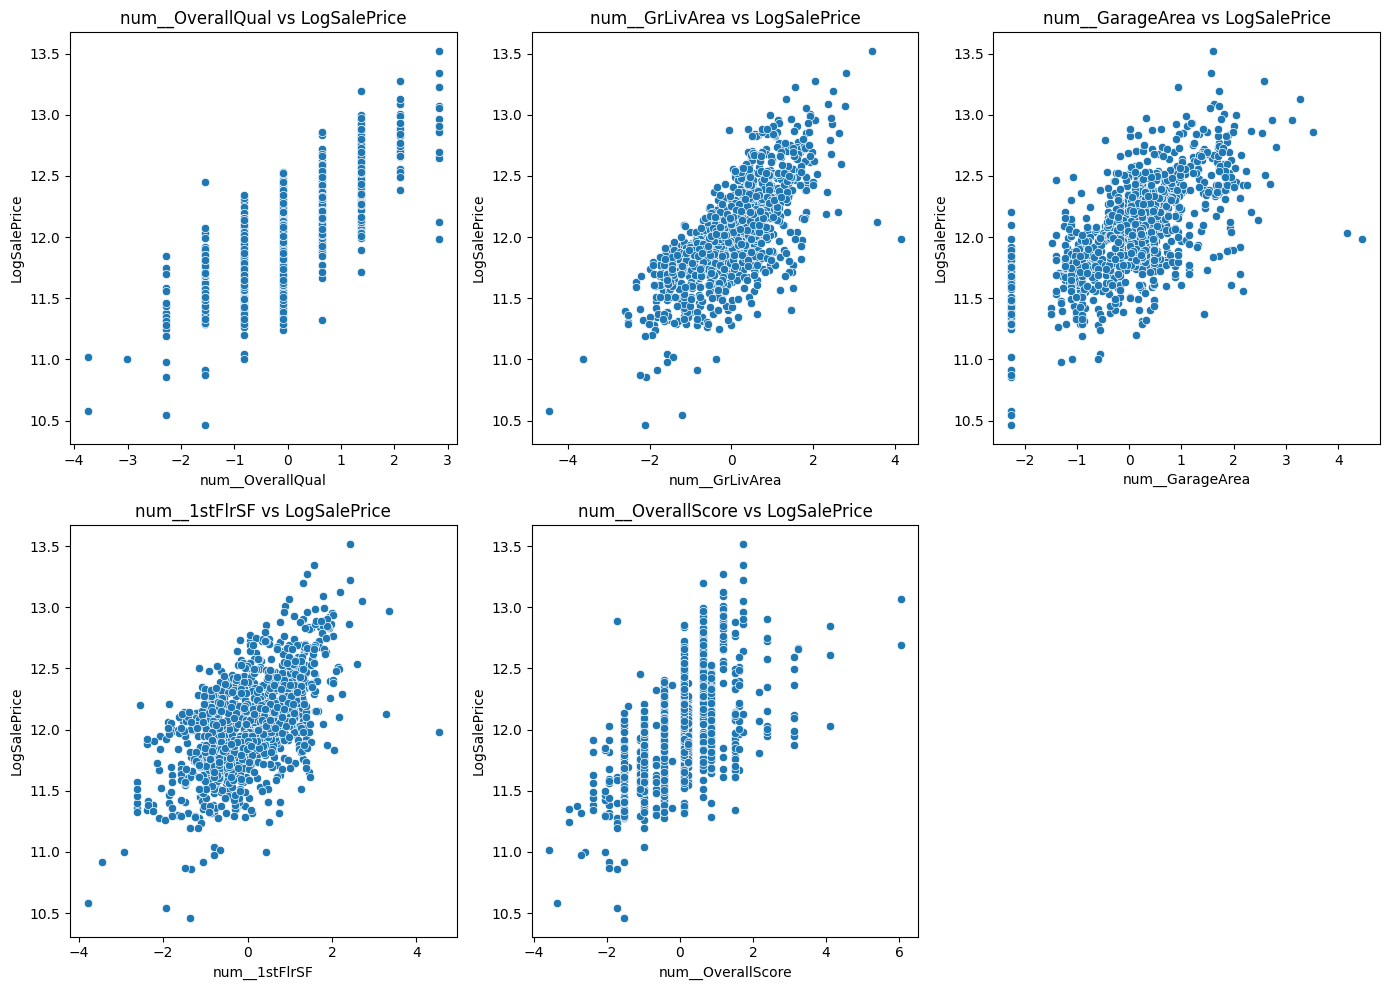

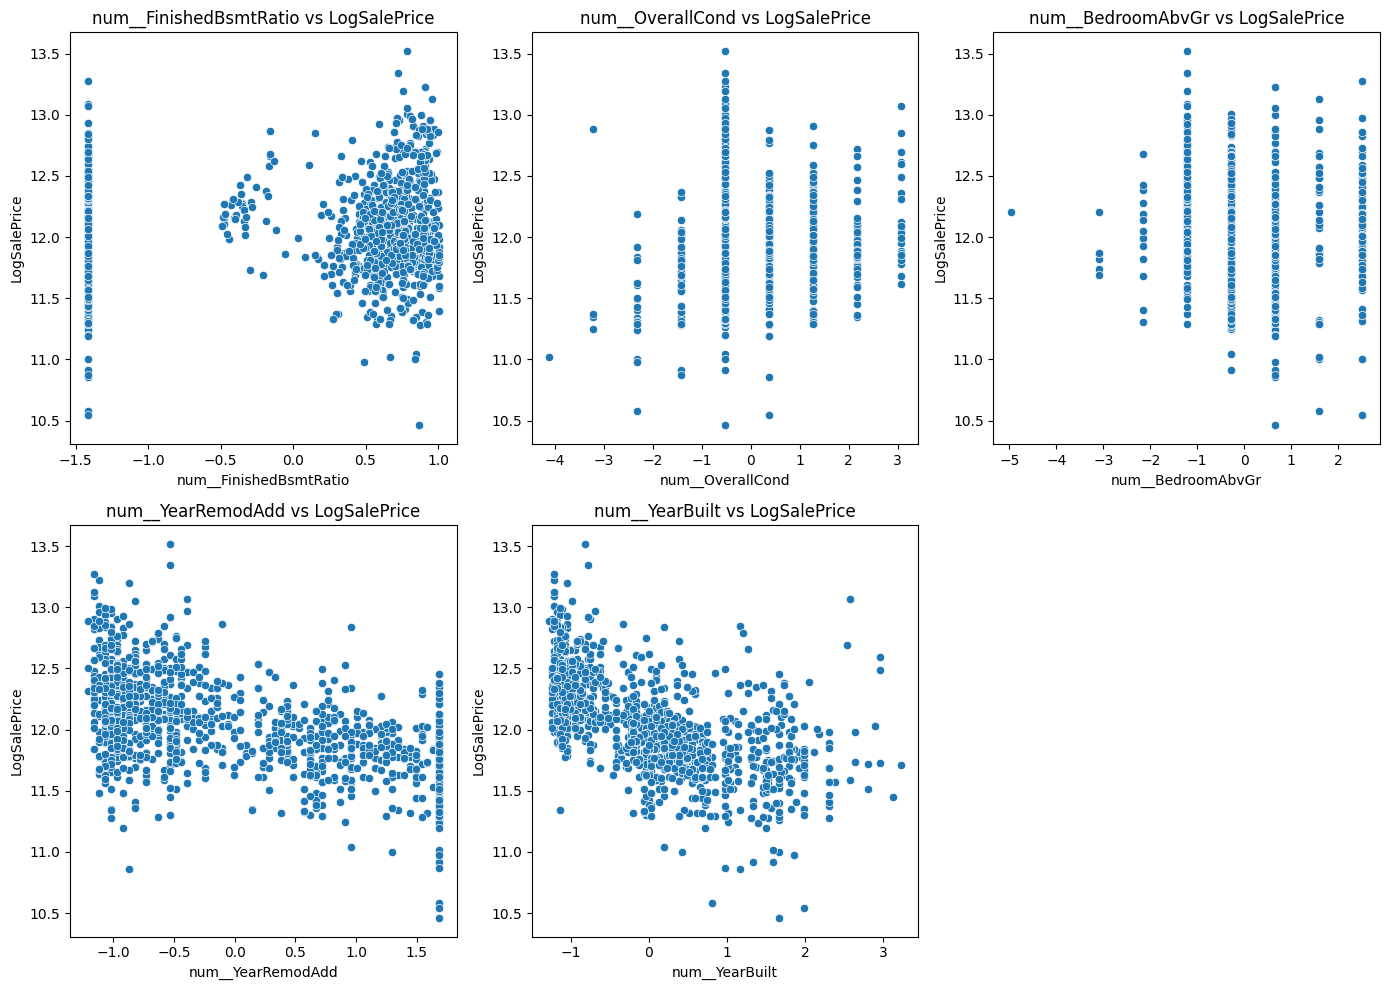

In [14]:
# Select top correlated features
top_positive_corr_features = target_corr[1:6].index
top_negative_corr_features = target_corr[-5:].index

# Scatterplots for positively correlated features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_positive_corr_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=x_train_with_target[feature], y=x_train_with_target['LogSalePrice'])
    plt.title(f"{feature} vs LogSalePrice")
    plt.xlabel(feature)
    plt.ylabel("LogSalePrice")
plt.tight_layout()
plt.show()

# Scatterplots for negatively correlated features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_negative_corr_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=x_train_with_target[feature], y=x_train_with_target['LogSalePrice'])
    plt.title(f"{feature} vs LogSalePrice")
    plt.xlabel(feature)
    plt.ylabel("LogSalePrice")
plt.tight_layout()
plt.show()

#### Correlation Analysis Summary
**Objective:**
Analyze the top features correlated with `LogSalePrice` and assess their relationships using scatterplots.

**Top Correlations with `LogSalePrice`:**
1. `num__OverallQual` (Correlation: 0.81): Highest correlation, indicating a strong association between overall quality and sale price.
2. `num__GrLivArea` (Correlation: 0.72): Strong correlation, larger living areas are associated with higher sale prices.
3. `num__GarageArea` (Correlation: 0.65): Moderate correlation, homes with larger garages often fetch higher prices.
4. `num__1stFlrSF` (Correlation: 0.60): Moderate correlation, suggesting the first-floor area is an important predictor.
5. `num__OverallScore` (Correlation: 0.59): Composite metric of quality and condition, showing relevance for predicting prices.
6. `num__Age` (Correlation: 0.58): Positive correlation with older homes having historical or architectural value.
7. `num__OpenPorchSF` (Correlation: 0.46): Modest correlation, open porch space likely enhances desirability.
8. `cat_HasPorch_1` (Correlation: 0.45): Indicates homes with porches generally attract higher prices.
9.  `num__LotArea` (Correlation: 0.42): Moderate correlation; lot size has a meaningful impact, though secondary to other factors.

**Observations from Scatterplots:**
Scatterplots were created for the following features:
1. `num__OverallQual`:
   - **Observation:** Clear lines with a strong upward trend.
   - **Analysis:** Discrete lines are due to categorical nature, with higher quality ratings closely linked to higher sale prices.
2. `num__GrLivArea`:
   - **Observation:** Scattered with an upward trend.
   - **Analysis:** Indicates that larger living areas generally increase sale prices, with some variability likely due to location or other factors.
3. `num__GarageArea`:
   - **Observation:** A tight line to the left (homes with no garages) and a cluster with an upwards trend.
   - **Analysis:** Suggests homes with garages are more desireable, though the size of the garage shows diminishing returns.
4. `num__1stFlrSF`:
   - **Observation:** Scattered with a slight upward trend.
   - **Analysis:** Indicates that first-florr areas have a moderate impact but may depend on total living area.
5. `num__OverallScore`:
   - **Observation:** Somewhat tighter distribution with an upward trend; potential outliers observed.
   - **Analysis:** Reflects that higher scores for overall condition and quality correspond with higher sale prices.
6. `num__FinishedBsmtRatio`:
   - **Observation:** Clustered to the right with no clear trend.
   - **Analysis:** Finished basement ratio appears less impactful on sale price, suggesting other factors dominate.
7. `num__OverallCond`:
   - **Observation:** Tighter lines with no clear trend.
   - **Analysis:** Overall condition does not strongly correlate with sale price, likely due to its limited variability across the dataset.
8. `num__BedroomAbvGr`:
   - **Observation:** Tight lines but no clear trend.
   - **Analysis:** Number of bedrooms above ground does not strongly influence price beyond a certain threshold.
9.  `num__YearRemodAdd`:
   - **Observation:** Scattered with a slight downward trend.
   - **Analysis:** Indicates newer remodels may not always correlate directly with higher sale prices, possibly due to the home's overall appeal or quality.
10. `num__YearBuilt`:
   - **Observation:** Scattered with a slight downwards trend.
   - **Analysis:** Older homes may have higher prices due to unique features, while newer homes vary based on location and design.

**Notable Outliers:**
- **Observation:**
  - `num__OverallScore`: Some points deviate significantly from the general trend.
  - `num__GrLivArea`: A few properties have disprportionately large living areas with lower sale prices.
  - `num__GarageArea`: Outliers include properties with very large garages but no corresponding increases in price.
- **Analysis:** These outliers may represent unique properties or data errors. Depending on their impact on the model's performance, they maya need further investigation or removal.

**Next Steps:**
1. **Addressing Outliers:**
   - Investigate and evaluate the impact of outliers on model performance.
   - Decide whether to handle outliers through removal, transformation, or retaining them as they may represent unique market cases.
2. **Model Preparation:**
   - Use insights from the correlation analysis to prioritize features during model training.
   - Ensure highly correlated features are considered for dimensionality reduction or regularization to avoid multicollinearity.
3. **Exploratory Validation:**
   - Compare the findings from this analysis against the mdoel's feature importance during training to validate the relevance of top-correlated features.
4. **Documentation:**
   - Summarize findings to ensure continuity when transitioning to modeling and evaluation stages.

### Pairwise Analysis

### Multivariate Analysis

### Feature Comparison Accross Quartiles

### Outlier Analysis

---

## Business Insights

### Key Drivers of Sale Price

### Client-Specific Observations

---

## Save Outputs

---

## Conclusion & Next Steps

### Conclusion

### Next Steps